# CAPITULO IV  PRONÓSTICOS

#### 4.1 Introducción.  
La mayoría de la actividades en los diferentes empresas públicas y privadas necesitan información futura, esto es la predicción del comportamiento de los datos en series de tiempo, ya que mucha de la información tiene variación estacional o cíclica de la tendencia donde los modelos de pronóstico nos permite hallar el valor esperado de acuerdo al comportamiento de los datos y permita a quien toma las decisiones poder realizar cambios en el comportamiento de los sistemas como:

	Patrones de demanda
    
	Calculo de la temperatura, humedad, viento 
    
	Compras ventas por periodos 
    
	Proyección de utilidades perdidas en meses años 
    
	Cartera de inversiones, variaciones de la bolsa de valores

**Modelos de pronóstico**

	Promedio Móvil
    
	Alisamiento exponencial(suavización exponencial)
    
	Regresión lineal
    
    Regresión cuadrática
    
#### 4.2 Promedio Móvil.
El método de promedio móvil se utiliza cuando se requiere dar más importancia a los datos recientes, el pronóstico se lo calcula con el promedio de n valores de los datos más recientes de la siguiente forma:

*Promedio Móvil=  (∑▒〖(n puntos de datos más recientes)〗)/n*


Ejemplo: Para este ejemplo vamos a utilizar una serie cronológica de las exportaciones de Ecuador del período 2003-2017,  datos tomados del sitio estadístico del BANCO CENTRAL DEL ECUADOR.
El análisis de pronósticos está enfocado a procesar los datos con los tres métodos promedio móvil, suavización exponencial y por ultimo con la regresión de los mínimos cuadrados.

Al final realizaremos un análisis de los datos con las diferentes opciones para realizar pronósticos.

Table:    **Tabla de Exportaciones Año 2003-2017**

 **Años** |  **EXPORTACIONES (MILLONES $)** | 
----------------------| --------------------------------|
*2003*  |   5,501.0
*2004*  |   6,232.7
*2005*  |   8,118.3
*2006*  |  10,137.0
*2007*  |  10,449.5
*2008*  |  12,794.6
*2009*  |   9,939.1
*2010*  |  13,193.0
*2011*  |  16,036.2 
*2012*  |  18,496.9
*2013*  |  18,709.3
*2014*  |  19,363.5
*2015*  |  16,521.5
*2016*  |  15,175.4
*2017*  |  16,927.0 


Fuente: Banco Central del Ecuador



In [1]:
### Promedio Móvil

# Vamos a crear un DataFrame con los datos y luego procederemos a calcular el promedio movil MMO_3 = 3 y MMO_4 = 4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# el DataFrame se llama movil
exporta = {'Año':[2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017],
                    'Exportaciones':[5501.0, 6232.7, 8118.3, 10137.00, 10449.50, 12794.60, 9939.10,
                                     13193.00, 16036.2, 18496.90, 18709.30, 19363.50, 16521.50, 15175.40,
                                     16927.00]}
movil = pd.DataFrame(exporta)
# mostramos los 5 primeros registros 
movil.head()

# calculamos para la primera media móvil MMO_3

for i in range(0,movil.shape[0]-2):
    movil.loc[movil.index[i+2],'MMO_3'] = np.round(((movil.iloc[i,1]+movil.iloc[i+1,1]+movil.iloc[i+2,1])/3),1)

# calculamos para la segunda media móvil MMO_4    
for i in range(0,movil.shape[0]-3):
    movil.loc[movil.index[i+3],'MMO_4'] = np.round(((movil.iloc[i,1]+movil.iloc[i+1,1]+movil.iloc[i+2,1]+movil.iloc[i+3,1])/4),1)

# calculamos la proyeción final

proyeccion = movil.iloc[12:,[1,2,3]]
p1,p2,p3 =proyeccion.mean()
# incorporamos al DataFrame
a = movil.append({'Año':2018,'Exportaciones':p1, 'MMO_3':p2, 'MMO_4':p3},ignore_index=True)
# mostramos los resultados

a['e_MM3'] = a['Exportaciones']-a['MMO_3']
a['e_MM4'] = a['Exportaciones']-a['MMO_4']
a



,Año,Exportaciones,MMO_3,MMO_4,e_MM3,e_MM4
0,2003.0,5501.000000,NaN,NaN,NaN,NaN
1,2004.0,6232.700000,NaN,NaN,NaN,NaN
2,2005.0,8118.300000,6617.300000,NaN,1501.0,NaN
3,2006.0,10137.000000,8162.700000,7497.200000,1974.3,2639.8
4,2007.0,10449.500000,9568.300000,8734.400000,881.2,1715.1
5,2008.0,12794.600000,11127.000000,10374.800000,1667.6,2419.8
6,2009.0,9939.100000,11061.100000,10830.000000,-1122.0,-890.9
7,2010.0,13193.000000,11975.600000,11594.000000,1217.4,1599.0
8,2011.0,16036.200000,13056.100000,12990.700000,2980.1,3045.5
9,2012.0,18496.900000,15908.700000,14416.300000,2588.2,4080.6


#####  La fila 15 del DataFrame contiene los pronósticos del promedio móvil MMO_3, MMO_4,y los errores e_MM3,e_MM4
luego calculamos el promedio de cada una de las columnas y 

In [2]:
# calculamos el promedio de los cada una de las columnas de df
m1,m2,m3,m4,m5,m6 =a.mean()
print('Error Media Móvil 3 = ',round(m5),'Error Media Móvil 4 = ',round(m6))
      


Error Media Móvil 3 =  673 Error Media Móvil 4 =  959


#### Graficando los resultados


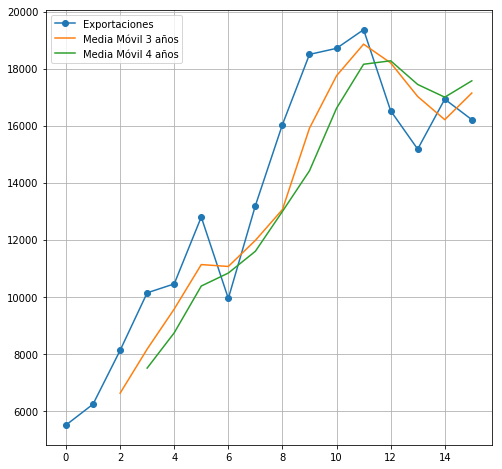

In [3]:
#%matplotlib inline

plt.figure(figsize=[8,8])
plt.grid(True)
plt.plot(a['Exportaciones'],label='Exportaciones',marker='o')
plt.plot(a['MMO_3'],label='Media Móvil 3 años')
plt.plot(a['MMO_4'],label='Media Móvil 4 años')
plt.legend(loc=2)



#### 4.3  Suavización Exponencial

> "La suavización exponencial utiliza un promedio ponderado de valores de series de tiempo pasadas como pronóstico; es un caso especial del método de promedios móviles ponderados en el cual seleccionamos sólo un peso, el peso para la observación más reciente. Los pesos para los demás valores se calculan de forma automática y se vuelven cada vez más pequeños a medida que las observaciones se alejan en el pasado.

    -Anderson, 11ed
    
El modelo de suavización exponencial básico es: 

$Sn = αXn–1 + (1–α)Sn–1$


-  $Sn = $ Estimación Alisada. Es una Combinación Lineal de todos las demandas pasadas con coeficientes que disminuyen en forma geométrica de acuerdo con la edad de observación.

- $Xn–1 = $  valor real de la serie de tiempo en el periodo n-1 

- $Sn–1 = $ pronóstico de la serie de tiempo del periodo n-1

- $α = $ constante de suavización (0 <= α =<  1)



	Alfa 	0.1	

table: 


  Año  |Exportaciones| Estimación Alisada     | Error 
-------| ------------| -----------------------|---------
  *n*  |     Xn      | Sn = αXn-1 + (1–α)Sn–1 | Er= Xn - Sn
  2003 |   5,501.0   |       0                |     0
  2004 |   6,232.7   |     5,501.00           |  731.70
  2005 |   8,118.3   |     5,574.17           |  2544.13
  
	


In [6]:
### Alisamiento Exponencial

# Vamos a crear un DataFrame con los datos y luego procederemos a calcular el promedio movil MMO_3 = 3 y MMO_4 = 4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# el DataFrame se llama movil
exporta = {'Año':[2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017],
                    'Exportaciones':[5501.0, 6232.7, 8118.3, 10137.00, 10449.50, 12794.60, 9939.10,
                                     13193.00, 16036.2, 18496.90, 18709.30, 19363.50, 16521.50, 15175.40,
                                     16927.00]}
movil = pd.DataFrame(exporta)
# mostramos los 5 primeros registros 
movil.head()
alfa = 0.5
unoalfa = 1. - alfa

for i in range(0,movil.shape[0]-1):
    movil.loc[movil.index[i+1],'SN'] = np.round(movil.iloc[i,1],1)

for i in range(2,movil.shape[0]):
    movil.loc[movil.index[i],'SN'] = np.round(movil.iloc[i-1,1],1)*alfa + np.round(movil.iloc[i-1,2],1)*unoalfa
i=i+1
p1=0
p2=np.round(movil.iloc[i-1,1],1)*alfa + np.round(movil.iloc[i-1,2],1)*unoalfa
a = movil.append({'Año':2018,'Exportaciones':p1, 'SN':p2},ignore_index=True)
a

# movil
      

,Año,Exportaciones,SN
0,2003.0,5501.0,NaN
1,2004.0,6232.7,5501.00
2,2005.0,8118.3,5866.85
3,2006.0,10137.0,6992.55
4,2007.0,10449.5,8564.80
5,2008.0,12794.6,9507.15
6,2009.0,9939.1,11150.90
7,2010.0,13193.0,10545.00
8,2011.0,16036.2,11869.00
9,2012.0,18496.9,13952.60


### 4.4 Regresión Lineal y  cuadrada



In [7]:
# Importar libreria numpy
import numpy as np

# datos experimentales
# el DataFrame se llama movil

exporta = {'Año':[2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017],
                    'Exportaciones':[5501.0, 6232.7, 8118.3, 10137.00, 10449.50, 12794.60, 9939.10,
                                     13193.00, 16036.2, 18496.90, 18709.30, 19363.50, 16521.50, 15175.40,
                                     16927.00]}
a = pd.DataFrame(exporta)
x = a.index.values
y= a["Exportaciones"]
# ajuste de la recta (polinomio de grado 1  f(x) = ax + b)
p = np.polyfit(x,y,1)  # 1 para lineal, 2 para polinomio ...
p0,p1 = p
print ("El valor de p0 = ", p0, "Valor de p1 = ", p1)


El valor de p0 =  910.1474999999998 Valor de p1 =  6801.967499999998


###    la función lineal resultante es:    f(x) =  910.14 + 6801.96x


[ 6801.9675  7712.115   8622.2625  9532.41   10442.5575 11352.705
 12262.8525 13173.     14083.1475 14993.295  15903.4425 16813.59
 17723.7375 18633.885  19544.0325]


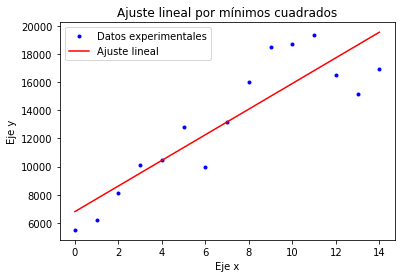

In [8]:
from matplotlib import pyplot as plt



# calculamos los valores ajustados y_ajuste

y_ajuste = p[0]*x + p[1]

print (y_ajuste)
# dibujamos los datos experimentales de la recta 

p_datos =plt.plot(x,y,'b.')
# Dibujamos la recta de ajuste

p_ajuste = plt.plot(x,y_ajuste, 'r-')

plt.title('Ajuste lineal por mínimos cuadrados')

plt.xlabel('Eje x')
plt.ylabel('Eje y')

plt.legend(('Datos experimentales','Ajuste lineal',), loc="upper left")
plt.show()


### Regresión Lineal cuadrada
$f(x) = ax^2 + bx + c$


In [9]:
p = np.polyfit(x,y,2)
p1,p2,p3 = p

print ("El valor de p0 = ", p0, "Valor de p1 = ", p1, " el valor de p2 = ",p2)




El valor de p0 =  910.1474999999998 Valor de p1 =  -76.89145927601825  el valor de p2 =  1986.6279298642573


$ F(x) = p0x^2 + p1x + p2 $

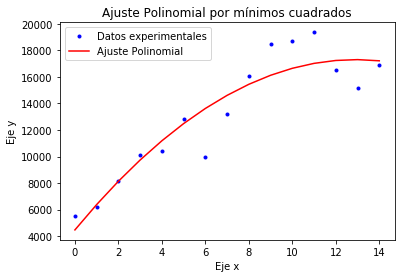

In [10]:
from matplotlib import pyplot as plt

# calculamos los valores ajustados y_ajuste

y_ajuste = p[0]*x*x + p[1]*x + p[2]

# dibujamos los datos experimentales de la recta 

p_datos =plt.plot(x,y,'b.')

# Dibujamos la curva de ajuste

p_ajuste = plt.plot(x,y_ajuste, 'r-')

plt.title('Ajuste Polinomial por mínimos cuadrados')

plt.xlabel('Eje x')
plt.ylabel('Eje y')

plt.legend(('Datos experimentales','Ajuste Polinomial',), loc="upper left")
plt.show()



In [11]:
x
#x.size


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [12]:
# 3 proyecciones de los siguientes días 
n=x.size
x1 = []
x2 = []


for i in [15,16,17]:
    y1_ajuste = p[0]*i*i + p[1]*i + p[2]
    print (f" z = {i}  w = {y1_ajuste}")
    x1.append(i)
    x2.append(y1_ajuste)

a["y_ajuste"]=y_ajuste

dp = pd.DataFrame({'Año':[2018,2019,2020], 'Exportaciones':[0,0,0],'y_ajuste':x2})
dp
a = a.append(dp,ignore_index=True)
a


 z = 15  w = 16968.43384615386
 z = 16  w = 16571.426538461554
 z = 17  w = 16020.636312217212


,Año,Exportaciones,y_ajuste
0,2003,5501.0,4469.593235
1,2004,6232.7,6379.329706
2,2005,8118.3,8135.283258
3,2006,10137.0,9737.453891
4,2007,10449.5,11185.841606
5,2008,12794.6,12480.446403
6,2009,9939.1,13621.268281
7,2010,13193.0,14608.307240
8,2011,16036.2,15441.563281
9,2012,18496.9,16121.036403


#### Graficamos el pronóstico

Ya tenemos el DataFrame con los pronósticos incluidos ahora si vamos a visualizarlos 
tomamos los datos del DataFrme


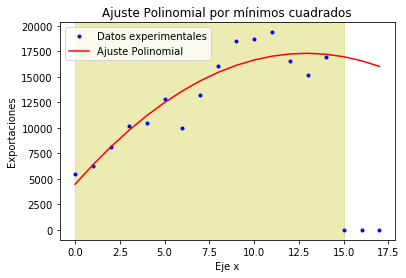

In [12]:
x = a.index.values
y_ajuste = a["y_ajuste"]
y= a["Exportaciones"]

p_datos =plt.plot(y,'b.')
p_ajuste = plt.plot(x,y_ajuste, 'r-')

plt.title('Ajuste Polinomial por mínimos cuadrados')

plt.xlabel('Eje x')
plt.ylabel('Exportaciones')
plt.axvspan(0,15,alpha=0.3,color='y')    # encajonamos los datos iniciales 
plt.legend(('Datos experimentales','Ajuste Polinomial',), loc="upper left")
plt.show()


In [13]:
#  Aqui en la gráfica ya observamos los nuevos valores de la proyección


In [14]:
# se pueden observar los valores de los pronósticos de los tres períodos siguientes:

dp


,Año,Exportaciones,y_ajuste
0,2018,0,16968.433846
1,2019,0,16571.426538
2,2020,0,16020.636312


###  Conclusiones 
como podemos observar con los tres modelos de pronóstico revisados, vemos que el de regresión linea o polinómica puede ser más efectivo en culquier trabajo de simulación, es más éste metodo es uno de los primeros que se utiliza para analisis de datos con Data Science, ya que con lo función $f(x) = ax^2 + bx + c$ nos facilita realizar la comprobación con cualquier valor de x, y no solo de un siguiente pronóstico:
